In [12]:
# nuskaitykite NYPD.
#Suraskite, kiek kieviename rajone (BORO) buvo susišaudymų.
# prisidėkite stulpelį, kuriame būtų tik įvykio laiko valandos
# Suraskite, kiek ir kokios rasės buvo nusikaltėlių; aukų?
# BONUS ADVANCED: vizualizuokite susišaudymų skaičių kas valandą skirtinguose rajonuose.

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates={'DATA':['OCCUR_DATE', 'OCCUR_TIME']})

In [18]:
nypd['HOUR'] = nypd['DATA'].dt.hour
nypd.head()

,DATA,INCIDENT_KEY,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude,HOUR
0,2019-08-23 22:10:00,201575314,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,40.697805,-73.808141,22
1,2019-11-27 15:54:00,205748546,BRONX,40,0.0,NaN,False,<18,M,BLACK,25-44,F,BLACK,40.818700,-73.918571,15
2,2019-02-02 19:40:00,193118596,MANHATTAN,23,0.0,NaN,False,18-24,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,40.791916,-73.945480,19
3,2019-10-24 00:52:00,204192600,STATEN ISLAND,121,0.0,PVT HOUSE,True,25-44,M,BLACK,25-44,F,BLACK,40.638064,-74.166108,0
4,2019-08-22 18:03:00,201483468,BRONX,46,0.0,NaN,False,25-44,M,BLACK HISPANIC,18-24,M,BLACK,40.854547,-73.913339,18


In [19]:
nypd['BORO'].value_counts()

BORO
BROOKLYN         8913
BRONX            6195
QUEENS           3225
MANHATTAN        2647
STATEN ISLAND     646
Name: count, dtype: int64

In [51]:
nypd['PERP_RACE'].value_counts().reset_index()

,PERP_RACE,count
0,BLACK,9336
1,UNKNOWN,1839
2,WHITE HISPANIC,1827
3,BLACK HISPANIC,1007
4,WHITE,239
5,ASIAN / PACIFIC ISLANDER,105
6,AMERICAN INDIAN/ALASKAN NATIVE,2


In [52]:
nypd['VIC_RACE'].value_counts().reset_index()

,VIC_RACE,count
0,BLACK,15470
1,WHITE HISPANIC,3105
2,BLACK HISPANIC,2085
3,WHITE,578
4,ASIAN / PACIFIC ISLANDER,286
5,UNKNOWN,93
6,AMERICAN INDIAN/ALASKAN NATIVE,9


In [95]:
# bronx = nypd.query('BORO == "BRONX"')[['BORO','HOUR']].value_counts().sort_index().reset_index()
boro_hour = nypd[['BORO','HOUR']].value_counts().sort_index().reset_index()

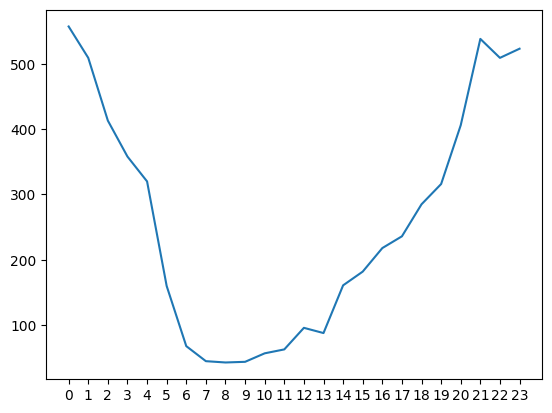

In [90]:
langas, grafikas = plt.subplots()

grafikas.plot(boro_hour['HOUR'], boro_hour['count'], label = 'BRONX')
grafikas.set_xticks(bronx['HOUR'])

plt.show()

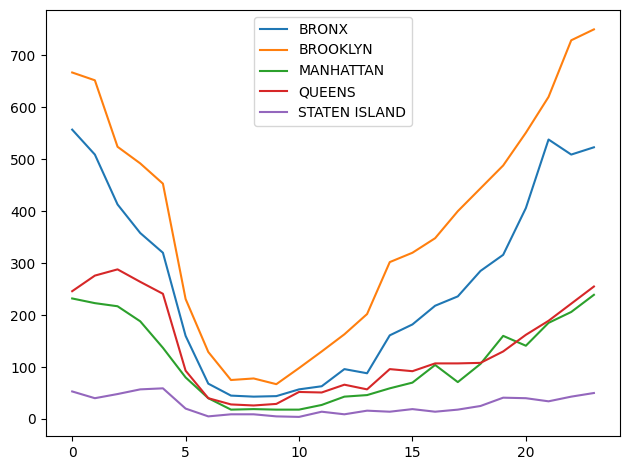

In [96]:
nypd = pd.read_csv('NYPD_Shooting.csv', sep=';', parse_dates=['OCCUR_TIME'])
nypd['H'] = nypd['OCCUR_TIME'].dt.hour
nypd = nypd[['BORO', 'PERP_RACE','VIC_RACE','H']]

nypdgr = nypd.groupby('BORO')

fig, axis = plt.subplots()
#plotting code:
for group in nypdgr.groups.keys():
    h = nypdgr.get_group(group)['H'].value_counts().sort_index()
    axis.plot(h.index, h.values, label=group)

axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [1]:
#:imp
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\User\OneDrive\Stalinis kompiuteris\Python mokymai\GIT_Repository\python_mokymai


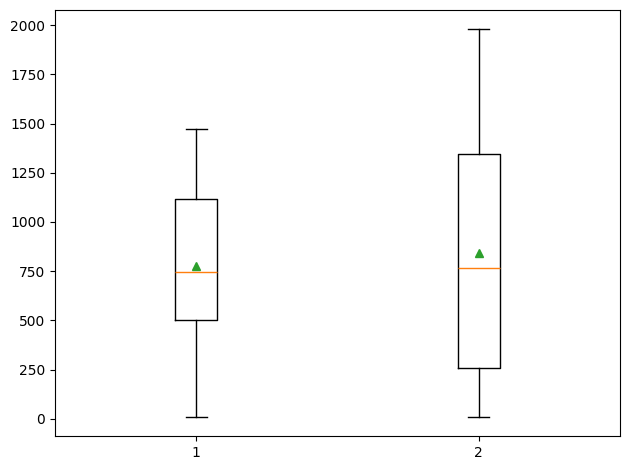

In [7]:
a = np.random.randint(10, 1500, 25)
b = np.random.rand(25)
c = np.random.randint(5, 2000, 25)
d = c*b

# :sfig
fig, axis = plt.subplots()
#plotting code:
axis.boxplot(a, showmeans=True)
axis.boxplot(c, showmeans=True, positions=[2])

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

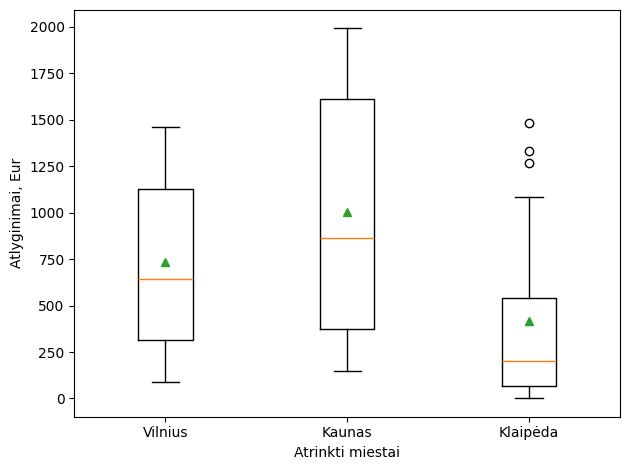

In [23]:
a = np.random.randint(10, 1500, 25)
b = np.random.rand(25)
c = np.random.randint(5, 2000, 25)
d = c*b

data = [a, c, d]

# :sfig
fig, axis = plt.subplots()
#plotting code:
axis.boxplot(data, showmeans=True)
axis.set_ylabel('Atlyginimai, Eur')
axis.set_xlabel('Atrinkti miestai')
axis.set_xticklabels(['Vilnius', 'Kaunas', 'Klaipėda'])

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [24]:
# Nuskaitykite life-exp.csv;
# gov-forms.csv
# ir sujunkite šias dvi lenteles į vieną naują lentelę.

life_exp = pd.read_csv('life-exp.csv')
gov_forms = pd.read_csv('gov-forms.csv')

In [25]:
life_exp.head()

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1955,29.854
1,Africa,NaN,1955,38.783
2,Albania,ALB,1955,57.007
3,Algeria,DZA,1955,43.916
4,American Samoa,ASM,1955,64.985


In [26]:
gov_forms.head()

,Name,Constitutional form,Head of state,Basis of executive legitimacy
0,Afghanistan,Republic,Executive,Presidency is independent of legislature
1,Albania,Republic,Ceremonial,Ministry is subject to parliamentary confidence
2,Algeria,Republic,Executive,Presidency independent of legislature; ministr...
3,Andorra,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
4,Angola,Republic,Executive,Presidency is independent of legislature


In [60]:
merged_table =  pd.merge(left=life_exp, right=gov_forms,
                                 left_on='Entity', right_on='Name', how='inner')
merged_table.head(10)

,Entity,Code,Year,Life expectancy,Name,Constitutional form,Head of state,Basis of executive legitimacy
0,Afghanistan,AFG,1955,29.854,Afghanistan,Republic,Executive,Presidency is independent of legislature
1,Albania,ALB,1955,57.007,Albania,Republic,Ceremonial,Ministry is subject to parliamentary confidence
2,Algeria,DZA,1955,43.916,Algeria,Republic,Executive,Presidency independent of legislature; ministr...
3,Andorra,AND,1955,66.111,Andorra,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
4,Angola,AGO,1955,36.315,Angola,Republic,Executive,Presidency is independent of legislature
5,Antigua and Barbuda,ATG,1955,58.946,Antigua and Barbuda,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
6,Argentina,ARG,1955,63.773,Argentina,Republic,Executive,Presidency is independent of legislature
7,Armenia,ARM,1955,63.865,Armenia,Republic,Ceremonial,Ministry is subject to parliamentary confidence
8,Australia,AUS,1955,69.998,Australia,Constitutionalmonarchy,Ceremonial,Ministry is subject to parliamentary confidence
9,Austria,AUT,1955,67.244,Austria,Republic,Ceremonial,Ministry is subject to parliamentary confidence


In [64]:
# Ar yra priklausomybė tarp vidutinės gyvenimo trukmės ir konstitucinės valdymo formos?

merged_table.query('Year == 2019')[['Constitutional form', 'Life expectancy']].groupby('Constitutional form').mean(numeric_only=True)


,Life expectancy
Constitutional form,
Absolute monarchy,72.262000
Constitutionalmonarchy,77.183368
Provisional,64.171333
Republic,71.958209


In [53]:
gov_forms['Constitutional form'].value_counts().reset_index()

,Constitutional form,count
0,Republic,145
1,Constitutionalmonarchy,39
2,Provisional,6
3,Absolute monarchy,5


In [78]:
# Suraskite 3kias valstybes, kuriose 2019 metais buvo trumpiausia gyvenimo trukmė.
# bei 3, kuriose buvo ilgiausia. hint: sort_values(by=), tail, head
# ADVANCED:
# su query() ir for ciklais, .plot() komanda atavizduokite šių atrinktų valstybių
# istorinius gyvenimo
# trukmės duomenis

bottom_3 = merged_table.query('Year == 2019')[['Name', 'Life expectancy']].sort_values(by='Life expectancy').reset_index().head(3)['Name']
top_3 = merged_table.query('Year == 2019')[['Name', 'Life expectancy']].sort_values(by='Life expectancy').reset_index().tail(3)['Name']
print(bottom_3.values)
print(top_3.values)

['Central African Republic' 'Chad' 'Lesotho']
['Japan' 'San Marino' 'Monaco']


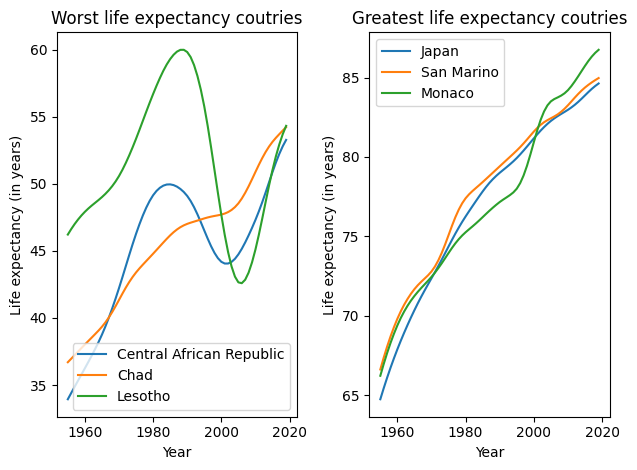

In [92]:
fig, axis = plt.subplots(1,2)
#plotting code:
for country in bottom_3:
    country_table = merged_table.query('Name == @country')
    axis[0].plot(country_table['Year'], country_table['Life expectancy'], label=country)
for country in top_3:
    country_table = merged_table.query('Name == @country')
    axis[1].plot(country_table['Year'], country_table['Life expectancy'], label=country)

axis[0].set_title('Worst life expectancy coutries')
axis[1].set_title('Greatest life expectancy coutries')
axis[0].legend(loc='best')
axis[1].legend(loc='best')
axis[0].set_xlabel('Year')
axis[1].set_xlabel('Year')
axis[0].set_ylabel('Life expectancy (in years)')
axis[1].set_ylabel('Life expectancy (in years)')
axis[1].set_ylabel('Life expectancy (in years)')



#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [119]:
# Nuskaitykite auto.csv failą.
# Suraskite 5-kis automobilių gamintojus, kurių gaminamų automobilių
# vidutinė kaina yra didžiausia.
# tada suraskite 5-kis gamintojus, kurių parduodamų automobilių vidutinis
# amžius yra didžiausias.

auto_data = pd.read_csv('auto.csv', sep='|')



In [138]:
import warnings
warnings.filterwarnings('ignore')

In [144]:
auto_data_small = auto_data[['gamintojas', 'pagaminimo_data', 'price']]

def fix_pagaminimo_data(a):
    return int(str(a)[:4])

def fix_price(a):
    return float(str(a).replace(' ',''))

auto_data_small['pagaminimo_data_fixed'] = auto_data_small['pagaminimo_data'].apply(fix_pagaminimo_data)
auto_data_small['price_fixed'] = auto_data_small['price'].apply(fix_price)
auto_data_small['amzius']=2024-auto_data_small['pagaminimo_data_fixed']
auto_data_small.head(3)

,gamintojas,pagaminimo_data,price,pagaminimo_data_fixed,price_fixed,amzius
0,BMW,2005-12,19 500,2005,19500.0,19
1,Mitsubishi,2006,2 700,2006,2700.0,18
2,Seat,2019-11,13 490,2019,13490.0,5


In [141]:
auto_data_small[['gamintojas','amzius']].groupby('gamintojas').mean().sort_values(by='amzius').tail()

,amzius
gamintojas,
UAZ,35.00
Pontiac,41.50
Lada,42.50
Lincoln,55.00
GAZ,58.25


In [145]:
auto_data_small[['gamintojas','price_fixed']].groupby('gamintojas').mean().sort_values(by='price_fixed').tail()

,price_fixed
gamintojas,
Maserati,34950.000000
Land Rover,40925.000000
Tesla,45666.666667
Porsche,61999.900000
Aston Martin,125000.000000


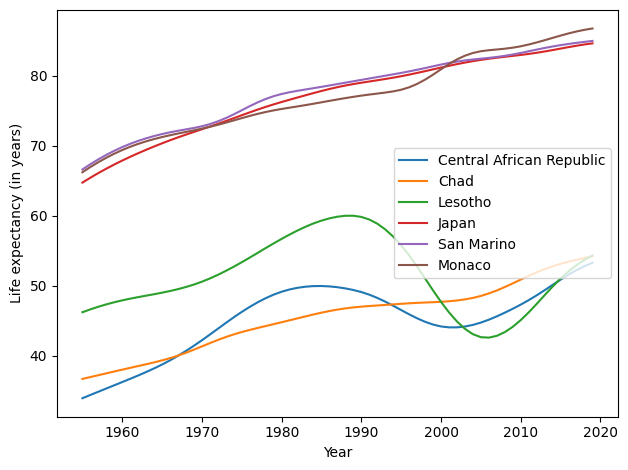

In [146]:
fig, axis = plt.subplots()
#plotting code:
for country in bottom_3:
    country_table = merged_table.query('Name == @country')
    axis.plot(country_table['Year'], country_table['Life expectancy'], label=country)
for country in top_3:
    country_table = merged_table.query('Name == @country')
    axis.plot(country_table['Year'], country_table['Life expectancy'], label=country)

axis.legend(loc='best')
axis.set_xlabel('Year')
axis.set_ylabel('Life expectancy (in years)')

#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [4]:
# nuskaitykite dus2014 ir dus2018 failus. 
# Suraskite vidutinius atlyginimus pagal išsilavinimo pakopą tiek 2014 tiek 2018 metams.
# Šiuos atlyginimus sudėkite į dataframe'us (reset_index()), juos sujunkite su merge į bedrą naują lentelę,
# pridėkite naują stulpelį, kur būtų apsakičiuotas pokytis tarp 2041 ir 2018 metų, procentais.

dus2014 = pd.read_csv('DUS2014.csv')
dus2018 = pd.read_csv('DUS2018.csv')

In [5]:
dus2014.head(3)

,svoris,stazas,darbo_laiko_dalis,evrk,im_dydzio_kodas,im_dydis,amzius,atostogu_dienos,sutarties_rusis,virsvalandziu_bdu,...,nuosavybe,bdu_val,nuts,vv_darb_sk,virsvalandziu_sk,premijos,bdu_spalio,priemokos,objectid,issilavinimas
0,35.03,0,0.58,XL,0,1_49,20-29,0,A,0,...,B,6.0,LT,6,0,0,6.0,0,1,G4
1,2.39,0,0.54,XN,0,1_49,20-29,0,A,0,...,B,6.0,LT,12,0,0,6.0,0,2,G2
2,16.70,0,0.56,XQ,2,GT_250,40-49,0,A,0,...,B,6.0,LT,360,0,0,6.0,0,3,G4


In [6]:
dus2014_by_education = dus2014[['issilavinimas','bdu_spalio']].groupby('issilavinimas').mean().reset_index()
dus2018_by_education = dus2018[['issilavinimas','bdu_spalio']].groupby('issilavinimas').mean().reset_index()
dus_merged = pd.merge(left = dus2014_by_education, right = dus2018_by_education, left_on='issilavinimas', right_on='issilavinimas',how='outer')

def convert_to_percent(a):
    if a >= 0:
        return f'+{a:.2%}'
    if a < 0:
        return f'-{a:.2%}'
    
dus_merged['bdu_spalio_2014'] = dus_merged['bdu_spalio_x']
dus_merged['bdu_spalio_2018'] = dus_merged['bdu_spalio_y']
dus_merged['2018 vs 2014'] = dus_merged['bdu_spalio_2018']/(dus_merged['bdu_spalio_2014']/3.4528)-1
dus_merged['2018 vs 2014'] = dus_merged['2018 vs 2014'].apply(convert_to_percent)
dus_merged = dus_merged.drop(columns=['bdu_spalio_x', 'bdu_spalio_y'])

dus_merged.head()

,issilavinimas,bdu_spalio_2014,bdu_spalio_2018,2018 vs 2014
0,G1,1639.198328,626.391679,+31.94%
1,G2,1877.952305,732.687157,+34.71%
2,G3,2521.961990,1094.764026,+49.88%
3,G4,3494.114124,1246.451196,+23.17%


In [8]:
def fix_age(a):
    if a == '14-19' or a == '20-29':
        return '14-29'
    else:
        return a

dus2014['age_fixed'] = dus2014['amzius'].apply(fix_age)
dus2018['age_fixed'] = dus2018['amzius'].apply(fix_age)

dus2014_by_age = dus2014[['age_fixed','bdu_spalio']].groupby('age_fixed').mean().reset_index()
dus2018_by_age = dus2018[['age_fixed','bdu_spalio']].groupby('age_fixed').mean().reset_index()
dus_merged = pd.merge(left = dus2014_by_age, right = dus2018_by_age, left_on='age_fixed', right_on='age_fixed',how='outer')

def convert_to_percent(a):
    if a >= 0:
        return f'+{a:.2%}'
    if a < 0:
        return f'-{a:.2%}'
    else:
        return 'N/A'
    
dus_merged['bdu_spalio_2014'] = dus_merged['bdu_spalio_x']
dus_merged['bdu_spalio_2018'] = dus_merged['bdu_spalio_y']
dus_merged['2018 vs 2014'] = dus_merged['bdu_spalio_2018']/(dus_merged['bdu_spalio_2014']/3.4528)-1
dus_merged['2018 vs 2014'] = dus_merged['2018 vs 2014'].apply(convert_to_percent)
dus_merged = dus_merged.drop(columns=['bdu_spalio_x', 'bdu_spalio_y'])

dus_merged.head(10)

,age_fixed,bdu_spalio_2014,bdu_spalio_2018,2018 vs 2014
0,14-29,2069.491756,865.563301,+44.41%
1,30-39,2748.111104,1088.955721,+36.82%
2,40-49,2419.098697,980.855429,+40.00%
3,50-59,2302.199750,856.067124,+28.39%
4,60+,2164.404096,784.542386,+25.16%


In [9]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
dus18 = pd.read_csv('DUS2018.csv')
dus18 = dus18[['lytis', 'amzius','issilavinimas', 'bdu_spalio']].sort_values(by='bdu_spalio')
dus18.tail(20)

,lytis,amzius,issilavinimas,bdu_spalio
9097,M,50-59,G4,8394
606,M,30-39,G4,8500
34577,M,40-49,G4,9148
27080,M,40-49,G4,9174
7280,M,40-49,G4,9211
40104,M,50-59,G4,9325
27081,M,50-59,G4,9414
39051,M,30-39,G4,9449
412,M,40-49,G4,10340
16007,M,30-39,G4,10498


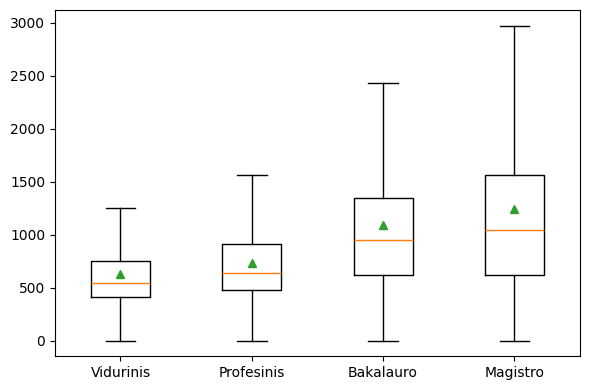

In [20]:
#boxplot
atl_g1 = dus18.query('issilavinimas == "G1"')['bdu_spalio'].values
atl_g2 = dus18.query('issilavinimas == "G2"')['bdu_spalio'].values
atl_g3 = dus18.query('issilavinimas == "G3"')['bdu_spalio'].values
atl_g4 = dus18.query('issilavinimas == "G4"')['bdu_spalio'].values
fig, axis = plt.subplots(figsize=(fwidth,fheight))
#plotting code:
axis.boxplot([atl_g1, atl_g2, atl_g3, atl_g4], showmeans=True, showfliers=False)
axis.set_xticklabels(['Vidurinis', 'Profesinis', 'Bakalauro', 'Magistro'])

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

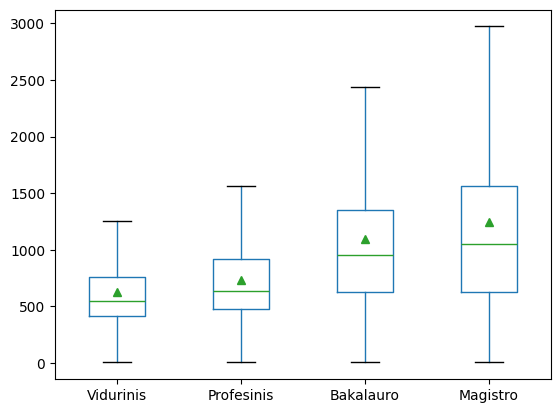

In [25]:
# boxplot II
boxplot_grafikas = dus18.groupby('issilavinimas').boxplot(column='bdu_spalio', subplots=False, showmeans=True, showfliers=False)
boxplot_grafikas.grid(visible=False)
boxplot_grafikas.set_xticklabels(['Vidurinis', 'Profesinis', 'Bakalauro', 'Magistro'])
plt.show()

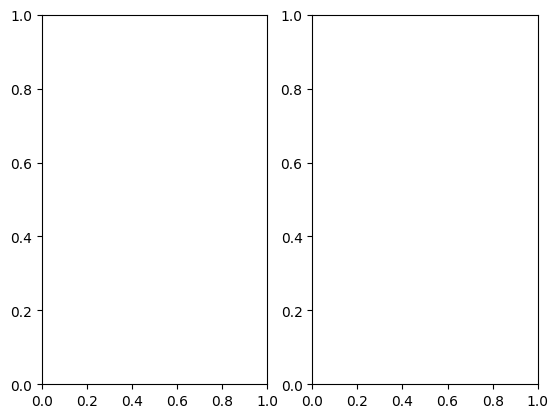

In [26]:
# kintamųjų išpakavimas, kad nereiktų kreiptis indeksais:
langas, (left, right) = plt.subplots(1,2)

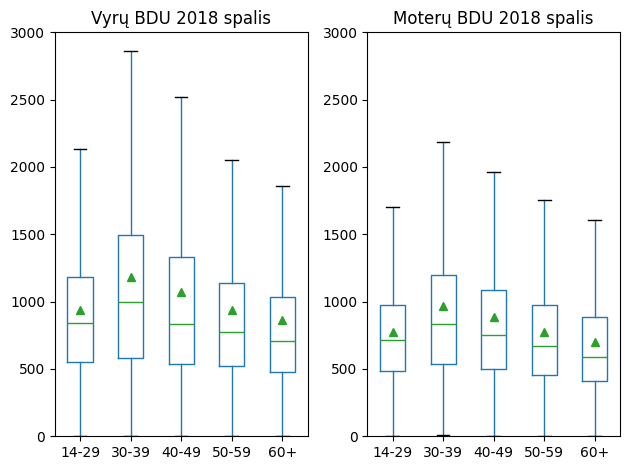

In [40]:
# sudėkite vizualizaciją boxplotais 2018 metų atlyginimų, pagal amžiaus grupes. su subplots() sukurkite 2 grafikus,
# kairiajame parodykite moterų statistiką, dešiniąjame - vyrų. Prisiminkite ir sudėkite ašių pavadinimus

fig, (vyrai, moterys) = plt.subplots(1,2)

vyrai = dus18.query('lytis == "M"')[['amzius', 'bdu_spalio']].groupby('amzius').boxplot(column='bdu_spalio', subplots=False, showmeans=True, showfliers=False, ax=vyrai)
moterys = dus18.query('lytis == "F"')[['amzius', 'bdu_spalio']].groupby('amzius').boxplot(column='bdu_spalio', subplots=False, showmeans=True, showfliers=False, ax=moterys)
vyrai.grid(visible=False)
moterys.grid(visible=False)
vyrai.set_xticklabels(['14-29', '30-39', '40-49', '50-59', '60+'])
moterys.set_xticklabels(['14-29', '30-39', '40-49', '50-59', '60+'])
vyrai.set_title('Vyrų BDU 2018 spalis')
moterys.set_title('Moterų BDU 2018 spalis')
vyrai.set_ylim(0,3000)
moterys.set_ylim(0,3000)
fig.tight_layout()
plt.show()

<Axes: xlabel='amzius', ylabel='bdu_spalio'>

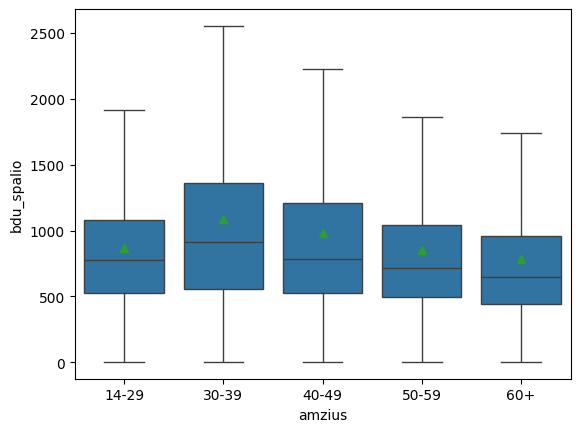

In [43]:
sns.boxplot(data=dus18.sort_values(by='amzius'), x='amzius', y='bdu_spalio', showmeans=True, showfliers=False)

In [1]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\User\OneDrive\Stalinis kompiuteris\Python mokymai\GIT_Repository\python_mokymai


In [6]:
# auto.csv:
# nuskaitykite jį, kainą į skaičių paverskite
# Su boxplotu vizualizuokite 5kių gamintojų, daugiausiai turinčių modelių skelbimuose,
# kainų pasiskirstymus.

auto_data = pd.read_csv('auto.csv', sep='|')[['gamintojas', 'price']]
auto_data.head()

,gamintojas,price
0,BMW,19 500
1,Mitsubishi,2 700
2,Seat,13 490
3,Skoda,14 650
4,Volvo,38 000


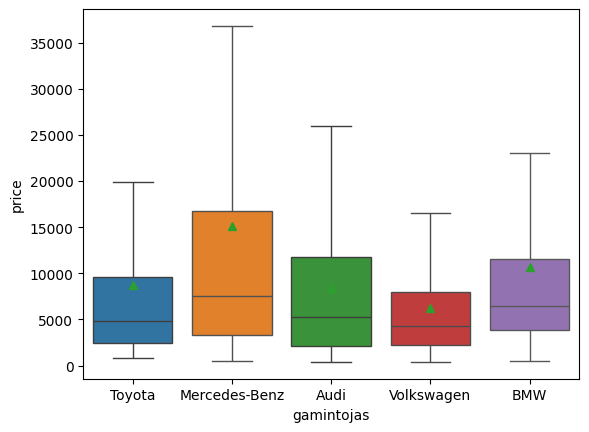

In [33]:
def fix_space(a): return float(str(a).replace(' ',''))
auto_data['price'] = auto_data['price'].apply(fix_space)
for gamintojas in list(auto_data['gamintojas'].value_counts().sort_values().reset_index().tail()['gamintojas']): sns.boxplot(data=auto_data.query('gamintojas == @gamintojas'), x='gamintojas', y='price', showmeans=True, showfliers=False)



In [ ]:
auto = pd.read_csv('auto.csv', sep='|')[['gamintojas','price','modelis','rida']]
auto['price'] = auto['price'].str.replace(' ','').apply(float)
g = list(auto['gamintojas'].value_counts().sort_values(ascending=False).index[:5])
sns.boxplot(data=auto.query('gamintojas in @g').sort_values(by='gamintojas'), x='gamintojas', y='price', showmeans=True, showfliers=False)
plt.show()

In [ ]:
auto['kaina'] = auto['price'].apply(lambda x: float(x.replace(' ', ''))) # paverciam kainas
auto_atrinkta = auto.merge(auto.value_counts('gamintojas').head(), left_on = 'gamintojas', right_on = 'gamintojas', how = 'right') # sumerginam
sns.boxplot(data=auto_atrinkta, x = 'gamintojas', y = 'kaina', showfliers = False, showmeans = True) #braizom

In [36]:
auto_data.head()

,gamintojas,price
0,BMW,19500.0
1,Mitsubishi,2700.0
2,Seat,13490.0
3,Skoda,14650.0
4,Volvo,38000.0


In [38]:
auto_data['G'] = auto_data['gamintojas'].str.upper().str[:3]
auto_data.head()

,gamintojas,price,G
0,BMW,19500.0,BMW
1,Mitsubishi,2700.0,MIT
2,Seat,13490.0,SEA
3,Skoda,14650.0,SKO
4,Volvo,38000.0,VOL


In [40]:
pip install requests


   ---------------------------------------- 0.0/62.6 kB ? eta -:--:--
   ---------------------------------------- 62.6/62.6 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/163.8 kB ? eta -:--:--
   ------------------------------------- -- 153.6/163.8 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 163.8/163.8 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/100.4 kB ? eta -:--:--
   ---------------------------------------- 100.4/100.4 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/66.8 kB ? eta -:--:--
   ---------------------------------------- 66.8/66.8 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/121.1 kB ? eta -:--:--
   ---------------------------------------- 121.1/121.1 kB 3.6 MB/s eta 0:00:00


In [2]:
import requests as rq

In [5]:
url = 'https://api.meteo.lt/v1/stations'

response = rq.get(url)
stations = response.json()
print(stations)

[{'code': 'birzu-ams', 'name': 'Biržų AMS', 'coordinates': {'latitude': 56.193191, 'longitude': 24.774184}}, {'code': 'dotnuvos-ams', 'name': 'Dotnuvos AMS', 'coordinates': {'latitude': 55.395993, 'longitude': 23.866224}}, {'code': 'duksto-ams', 'name': 'Dūkšto AMS', 'coordinates': {'latitude': 55.517856, 'longitude': 26.31614}}, {'code': 'kauno-ams', 'name': 'Kauno AMS', 'coordinates': {'latitude': 54.88396, 'longitude': 23.83588}}, {'code': 'klaipedos-ams', 'name': 'Klaipėdos AMS', 'coordinates': {'latitude': 55.73135, 'longitude': 21.09157}}, {'code': 'kybartu-ams', 'name': 'Kybartų AMS', 'coordinates': {'latitude': 54.633167, 'longitude': 22.783011}}, {'code': 'laukuvos-ams', 'name': 'Laukuvos AMS', 'coordinates': {'latitude': 55.60886, 'longitude': 22.239463}}, {'code': 'lazdiju-ams', 'name': 'Lazdijų AMS', 'coordinates': {'latitude': 54.23221, 'longitude': 23.51068}}, {'code': 'nidos-ams', 'name': 'Nidos AMS', 'coordinates': {'latitude': 55.30221, 'longitude': 21.00736}}, {'code'

In [6]:
#iš to responso išrinkite į sąrašą visus ams kodus ('code' raktažodis)

# ams = [element.get('name') for element in stations]
ams = [element['code'] for element in stations]
print(ams)

['birzu-ams', 'dotnuvos-ams', 'duksto-ams', 'kauno-ams', 'klaipedos-ams', 'kybartu-ams', 'laukuvos-ams', 'lazdiju-ams', 'nidos-ams', 'panevezio-ams', 'raseiniu-ams', 'siauliu-ams', 'silutes-ams', 'telsiu-ams', 'ukmerges-ams', 'utenos-ams', 'varenos-ams', 'vilniaus-ams']


In [49]:
latitudes = [element['coordinates']['latitude'] for element in stations]
print(latitudes)

[56.193191, 55.395993, 55.517856, 54.88396, 55.73135, 54.633167, 55.60886, 54.23221, 55.30221, 55.735154, 55.394569, 55.942222, 55.352222, 55.991245, 55.264145, 55.515321, 54.248271, 54.625992]


In [50]:
url = 'https://api.meteo.lt/v1/stations/vilniaus-ams/observations/2024-04-17'
obs = rq.get(url).json()

In [53]:
print(obs)

{'station': {'code': 'vilniaus-ams', 'name': 'Vilniaus AMS', 'coordinates': {'latitude': 54.625992, 'longitude': 25.107064}}, 'observations': [{'observationTimeUtc': '2024-04-17 00:00:00', 'airTemperature': 3.4, 'feelsLikeTemperature': 0.4, 'windSpeed': 3.3, 'windGust': 9.3, 'windDirection': 260, 'cloudCover': 100, 'seaLevelPressure': 998.1, 'relativeHumidity': 93, 'precipitation': 0, 'conditionCode': 'light-rain'}, {'observationTimeUtc': '2024-04-17 01:00:00', 'airTemperature': 3.4, 'feelsLikeTemperature': 0.2, 'windSpeed': 3.5, 'windGust': 6.7, 'windDirection': 261, 'cloudCover': 100, 'seaLevelPressure': 998.3, 'relativeHumidity': 98, 'precipitation': 0.5, 'conditionCode': 'light-rain'}, {'observationTimeUtc': '2024-04-17 02:00:00', 'airTemperature': 3.8, 'feelsLikeTemperature': 1.1, 'windSpeed': 3, 'windGust': 6.8, 'windDirection': 277, 'cloudCover': 100, 'seaLevelPressure': 998.8, 'relativeHumidity': 99, 'precipitation': 0.1, 'conditionCode': 'rain'}, {'observationTimeUtc': '2024-0

In [12]:
#atrinkiti visų stočių užfiksuotą temperatūrą 00:00:00 laiku, šiai dienai

temperatures_midnight = []

for station in ams:
    obs = rq.get(f'https://api.meteo.lt/v1/stations/{station}/observations/2024-04-18').json()
    temperatures_midnight.append(obs['observations'][0]['airTemperature'])

print(temperatures_midnight)

[1.9, 4.7, 0.5, 4.6, 3.6, 3.8, 3, 4.3, 4.6, 3.5, 1.2, 2.8, 4, 3.3, 2.5, 0.6, 1.6, 3.5]


In [ ]:
#rasti 3 meteo stotis, kuriose fiksuota temperatūra 00:00 laiku buvo didžiausia:

In [21]:
data_frame_temperatures = pd.DataFrame()
data_frame_temperatures['stotis'] = ams
data_frame_temperatures['mifnight_temperature'] = temperatures_midnight

data_frame_temperatures.sort_values(by='mifnight_temperature', ascending=False).head(3)

,stotis,mifnight_temperature
1,dotnuvos-ams,4.7
8,nidos-ams,4.6
3,kauno-ams,4.6


In [40]:
#nuskaitykite auto.csv failą į dataframe'ą.

# prie lentelės pridėkite naują stulpelį, kur būtų rida, suapvalinta 15 000 km intervalais.
# apvalinama į aukštesnę pusę:
#  1 km turi tapti 15 000 km
# 5600 km turi tapti 15 000 km
# 15 001 km turi tapti 30 000 km
# 25 800 km turi tapti 30 000 km
# 30 001 km turi tapti 45 000 km

# suraskite visus gamintojus, kurių  modelių vidutinė kaina yra didesnė už vidutinę
# visų automobilių
# kainą. (groupby, reset_index, query)
# Iš jų atrinkite 5-kis brangiausius gamintojus, ir suraskite jų 
# parduodamų modelių vidutinį amžių.
# taip pat atvaizduokite su boxplot'ais šių 5-kių gamintojų parduodamų modelių amžius.

# suskaičiuokite vidutinę kainą kiekvienam ridos intervalui.
# prisiminkite .plot() - atvaizduokite priklausomybę tarp ridos intervalų ir vidutinės kainos tame intervale

# atvaizduokite boxplotu kainų pasiskirstymą nuo kuro rūšies/tipo
# atvaziduokite boxplotu ridos pasiskirstymą nuo kuro rūšies/tipo
# atvaizduokite boxplotas kainos pasiskirstymą nuo ridos (15 000 km intervalais apvalintos)
# atvaizduokite boxplotais ridos pasiskirstymo priklausomybę nuo gamintojo

# pagal jūsų surinktas ir pastebėtas priklausomybes, jei matote:
# M-Benz, 12 metų, benzinas, 210 000 km -
# kokia kaina būtų konkurencinga/logiška/tikėtina? Kodėl?

auto_data = pd.read_csv('auto.csv', sep='|')[['gamintojas', 'rida', 'price', 'pagaminimo_data', 'kuro_tipas']]
auto_data.head(3)

,gamintojas,rida,price,pagaminimo_data,kuro_tipas
0,BMW,253 000 km,19 500,2005-12,Benzinas
1,Mitsubishi,195 405 km,2 700,2006,Benzinas
2,Seat,129 800 km,13 490,2019-11,Dyzelinas


In [41]:
def fix_rida(a):
    try:
        rida = float(a[:-3].replace(' ', ''))
    except:
        return 0
    else:
        return rida
def fix_price(a): return float(str(a).replace(' ', ''))
def fix_pagaminimo_data(a): return int(str(a)[:4])

auto_data['rida'] = auto_data['rida'].apply(fix_rida)
auto_data['price'] = auto_data['price'].apply(fix_price)
auto_data['amzius'] = 2024 - auto_data['pagaminimo_data'].apply(fix_pagaminimo_data)

auto_data.head(3)

,gamintojas,rida,price,pagaminimo_data,kuro_tipas,amzius
0,BMW,253000.0,19500.0,2005-12,Benzinas,19
1,Mitsubishi,195405.0,2700.0,2006,Benzinas,18
2,Seat,129800.0,13490.0,2019-11,Dyzelinas,5


In [78]:
def ridos_intervalas(a): return int(np.ceil(a/15000)*15000)
auto_data['ridos_intervalas'] = auto_data['rida'].apply(ridos_intervalas)
auto_data.head(3)

,gamintojas,rida,price,pagaminimo_data,kuro_tipas,amzius,ridos_intervalas
0,BMW,253000.0,19500.0,2005-12,Benzinas,19,255000
1,Mitsubishi,195405.0,2700.0,2006,Benzinas,18,210000
2,Seat,129800.0,13490.0,2019-11,Dyzelinas,5,135000


In [75]:
average_price = auto_data['price'].mean()
above_average_price = auto_data.groupby('gamintojas').mean(numeric_only=True).sort_values(by='price', ascending=False).query('price > @average_price').reset_index()
print(above_average_price)

       gamintojas           rida          price     amzius  ridos_intervalas
0    Aston Martin   45000.000000  125000.000000   9.000000      45000.000000
1         Porsche  103957.400000   61999.900000   8.200000     111000.000000
2           Tesla  104155.777778   45666.666667   5.888889     110000.000000
3      Land Rover  133625.000000   40925.000000   6.750000     138750.000000
4        Maserati  215000.000000   34950.000000   7.000000     225000.000000
5         Pontiac  203009.000000   23250.000000  41.500000     210000.000000
6         Lincoln   79000.000000   19500.000000  55.000000      90000.000000
7           Lexus  188518.416667   17013.250000  12.583333     193750.000000
8           Iveco  249641.250000   16124.000000   9.125000     256875.000000
9   Mercedes-Benz  261259.214689   15080.276836  15.186441     268305.084746
10       Infiniti  178815.200000   12790.000000  11.400000     186000.000000
11         Ligier    9000.000000   12200.000000   3.000000      15000.000000

In [79]:
top5_by_avg_price = auto_data.groupby('gamintojas').mean(numeric_only=True).sort_values(by='price').reset_index().query('price > @average_price').tail(5)
top5_by_avg_price.head()

,gamintojas,rida,price,amzius,ridos_intervalas
46,Maserati,215000.000000,34950.000000,7.000000,225000.0
47,Land Rover,133625.000000,40925.000000,6.750000,138750.0
48,Tesla,104155.777778,45666.666667,5.888889,110000.0
49,Porsche,103957.400000,61999.900000,8.200000,111000.0
50,Aston Martin,45000.000000,125000.000000,9.000000,45000.0


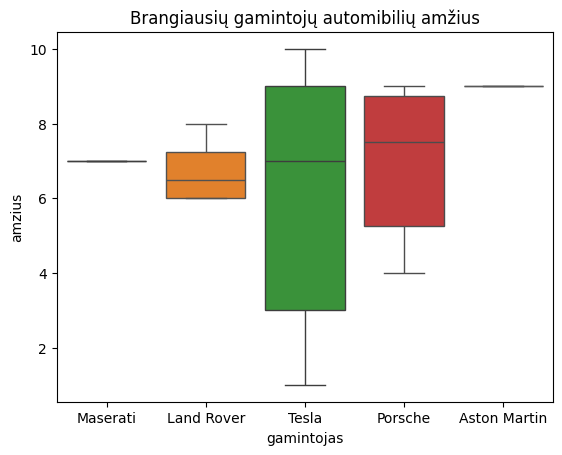

In [95]:
for gamintojas in top5_by_avg_price['gamintojas']:
    sns.boxplot(data=auto_data.query('gamintojas == @gamintojas'), x= 'gamintojas', y='amzius', showfliers=False).set_title('Brangiausių gamintojų automibilių amžius')

In [86]:
avg_price_by_interval = auto_data.query('ridos_intervalas >0 & ridos_intervalas <1000000').groupby('ridos_intervalas').mean(numeric_only=True).reset_index()
avg_price_by_interval.head(30)

,ridos_intervalas,rida,price,amzius
0,15000,6433.687500,25767.770833,11.666667
1,30000,23145.375000,38494.093750,5.375000
2,45000,37060.783784,34230.756757,5.648649
3,60000,52391.148148,31435.555556,10.333333
4,75000,68921.232143,17906.125000,9.607143
5,90000,82689.659091,17282.750000,11.772727
6,105000,97898.687500,16606.395833,9.854167
7,120000,113529.333333,13880.145833,11.416667
8,135000,128527.612903,15189.129032,11.354839
9,150000,143715.384615,9891.476923,13.507692


<function matplotlib.pyplot.show(close=None, block=None)>

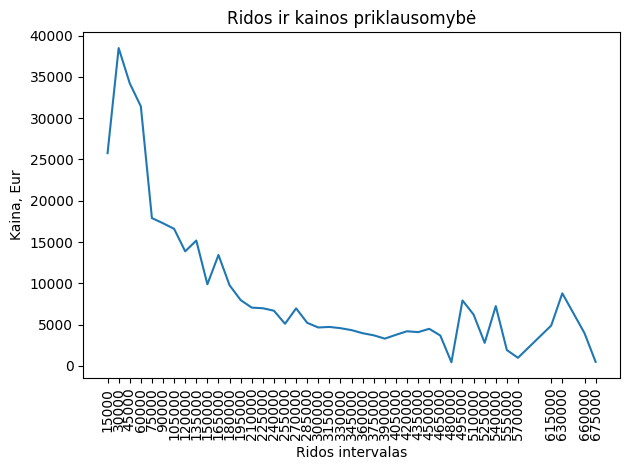

In [93]:
fig, axis = plt.subplots()
axis.plot(avg_price_by_interval['ridos_intervalas'], avg_price_by_interval['price'])
axis.set_xticks(avg_price_by_interval['ridos_intervalas'])
axis.set_title('Ridos ir kainos priklausomybė')
axis.set_xlabel('Ridos intervalas')
axis.set_ylabel('Kaina, Eur')
plt.xticks(rotation=90)
fig.tight_layout()
plt.show

In [3]:
import pandas as pd
import numpy as np

In [9]:
data_table = pd.DataFrame()
data_table['numeris'] = np.random.randint(1,10000000,100)
data_table['numeris_len'] = data_table['numeris'].apply(lambda x: len(str(x)))
data_table.head(10)

,numeris,numeris_len
0,6402188,7
1,91873,5
2,6434784,7
3,8558831,7
4,7746683,7
5,7127710,7
6,7126295,7
7,2319674,7
8,4224681,7
9,3218240,7
